In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics, preprocessing
from scipy import stats
 
%matplotlib inline

In [ ]:

#using pandas to read our dataset. head() to see the first 5 rows
df_energy = pd.read_csv("energydata_complete.csv")
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
column_names = {"date": "Date", "Appliances": "Appliances (Wh)", "lights": "Lights (Wh)", "T1": "Kitchen Temperature", "RH_1": "Kitchen Humidity",
                "T2": "Living Room Temperature", "RH_2": "Living Room Humidity", "T3": "Laundry Room Temperature", "RH_3": "Laundry Room Humidity",
                "T4": "Office Temperature", "RH_4": "Office Humidity", "T5": "Bathroom Temperature", "RH_5": "Bathroom Humidity",
                "T6": "Outside Building Temperature (North Side)", "RH_6": "Outside Building Humidity (North Side)", "T7": "Ironing Room Temperature", "RH_7": "Ironing Room Humidity",
                "T8": "Teenager Room_2 Temperature", "RH_8": "Teenager Room_2 Humidity", "T9": "Parents Room Temperature", "RH_9": "Parents Room Humidity",
                "T_out": "Outside Temperature (from CWS)", "Press_mm_hg": "Pressure mm_Hg (from CWS)", "RH_out": "Outside Humidity (from CWS)", "Windspeed": "Wind speed (m/s)(from CWS)",
                "Visibility": "Visibility (km)(from CWS)", "Tdewpoint": "Tdewpoint (from CWS)", "rv1": "Random variable 1", "rv2": "Random variable 2"
}

In [ ]:
 
#renaming the columns for easier reading
df_energy = df_energy.rename(columns = column_names)
df_energy.head()

,Date,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,...,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [1]:
 
#to see the summary of the new df
df_energy.info()

NameError: ignored

In [ ]:
df_energy.describe()

,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,...,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df_energy.corr()

,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,...,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
Appliances (Wh),1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
Lights (Wh),0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
Kitchen Temperature,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Kitchen Humidity,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Living Room Temperature,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
Living Room Humidity,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
Laundry Room Temperature,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
Laundry Room Humidity,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
Office Temperature,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
Office Humidity,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [ ]:
df_energy.corr()['Appliances (Wh)'].sort_values()

Outside Humidity (from CWS)                 -0.152282
Teenager Room_2 Humidity                    -0.094039
Outside Building Humidity (North Side)      -0.083178
Living Room Humidity                        -0.060465
Ironing Room Humidity                       -0.055642
Parents Room Humidity                       -0.051462
Pressure mm_Hg (from CWS)                   -0.034885
Random variable 1                           -0.011145
Random variable 2                           -0.011145
Visibility (km)(from CWS)                    0.000230
Bathroom Humidity                            0.006955
Parents Room Temperature                     0.010010
Tdewpoint (from CWS)                         0.015353
Office Humidity                              0.016965
Bathroom Temperature                         0.019760
Ironing Room Temperature                     0.025801
Laundry Room Humidity                        0.036292
Teenager Room_2 Temperature                  0.039572
Office Temperature          

In [ ]:
#sns.pairplot(subdf_energy)

In [ ]:
df_energy.columns

Index(['Date', 'Appliances (Wh)', 'Lights (Wh)', 'Kitchen Temperature',
       'Kitchen Humidity', 'Living Room Temperature', 'Living Room Humidity',
       'Laundry Room Temperature', 'Laundry Room Humidity',
       'Office Temperature', 'Office Humidity', 'Bathroom Temperature',
       'Bathroom Humidity', 'Outside Building Temperature (North Side)',
       'Outside Building Humidity (North Side)', 'Ironing Room Temperature',
       'Ironing Room Humidity', 'Teenager Room_2 Temperature',
       'Teenager Room_2 Humidity', 'Parents Room Temperature',
       'Parents Room Humidity', 'Outside Temperature (from CWS)',
       'Pressure mm_Hg (from CWS)', 'Outside Humidity (from CWS)',
       'Wind speed (m/s)(from CWS)', 'Visibility (km)(from CWS)',
       'Tdewpoint (from CWS)', 'Random variable 1', 'Random variable 2'],
      dtype='object')

In [ ]:
scaler = preprocessing.MinMaxScaler()

In [ ]:
subdf_energy = df_energy.drop(columns = ['Date', 'Lights (Wh)'])
subdf_energy

,Appliances (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,Bathroom Temperature,...,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
normalised_df = pd.DataFrame(scaler.fit_transform(subdf_energy), columns = subdf_energy.columns)
features = normalised_df.drop(columns = ["Appliances (Wh)"])
target_var = normalised_df["Appliances (Wh)"]

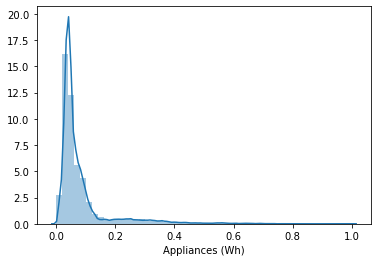

In [ ]:
sns.distplot(normalised_df["Appliances (Wh)"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = features
y = target_var

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
lm = LinearRegression()


In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

0.15288843775611266
[-3.28105119e-03  5.53554397e-01 -2.36221964e-01 -4.56748932e-01
  2.90655550e-01  9.60634877e-02  2.89967537e-02  2.63883677e-02
 -1.56575482e-02  1.60069630e-02  2.36430887e-01  3.80494235e-02
  1.03072874e-02 -4.46035833e-02  1.02002743e-01 -1.57611021e-01
 -1.89945789e-01 -3.97984795e-02 -3.21847802e-01  6.84613561e-03
 -7.76538084e-02  2.91914846e-02  1.23045082e-02  1.17758564e-01
  2.31035306e+10 -2.31035306e+10]


In [ ]:
X_train.columns

Index(['Kitchen Temperature', 'Kitchen Humidity', 'Living Room Temperature',
       'Living Room Humidity', 'Laundry Room Temperature',
       'Laundry Room Humidity', 'Office Temperature', 'Office Humidity',
       'Bathroom Temperature', 'Bathroom Humidity',
       'Outside Building Temperature (North Side)',
       'Outside Building Humidity (North Side)', 'Ironing Room Temperature',
       'Ironing Room Humidity', 'Teenager Room_2 Temperature',
       'Teenager Room_2 Humidity', 'Parents Room Temperature',
       'Parents Room Humidity', 'Outside Temperature (from CWS)',
       'Pressure mm_Hg (from CWS)', 'Outside Humidity (from CWS)',
       'Wind speed (m/s)(from CWS)', 'Visibility (km)(from CWS)',
       'Tdewpoint (from CWS)', 'Random variable 1', 'Random variable 2'],
      dtype='object')

In [ ]:
pd.DataFrame(lm.coef_, X_train.columns, columns =["Coefficient"]).sort_values(by = "Coefficient")

,Coefficient
Random variable 2,-2.310353e+10
Living Room Humidity,-4.567489e-01
Outside Temperature (from CWS),-3.218478e-01
Living Room Temperature,-2.362220e-01
Parents Room Temperature,-1.899458e-01
Teenager Room_2 Humidity,-1.576110e-01
Outside Humidity (from CWS),-7.765381e-02
Ironing Room Humidity,-4.460358e-02
Parents Room Humidity,-3.979848e-02
Bathroom Temperature,-1.565755e-02


In [ ]:
prediction = lm.predict(X_test)
prediction

array([0.03322329, 0.24411883, 0.03399123, ..., 0.06845011, 0.10032572,
       0.05721965])

In [ ]:
y_test

8980     0.028037
2754     0.074766
9132     0.037383
14359    0.037383
8875     0.056075
           ...   
831      0.224299
10993    0.046729
11761    0.037383
12364    0.093458
11863    0.037383
Name: Appliances (Wh), Length: 5921, dtype: float64

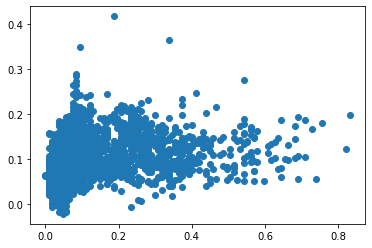

In [ ]:
plt.scatter(y_test, prediction)

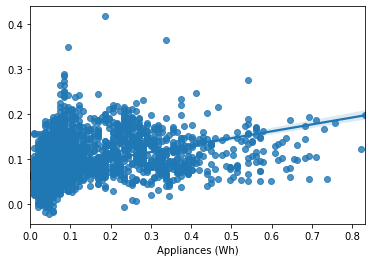

In [ ]:
sns.regplot(y_test, prediction)

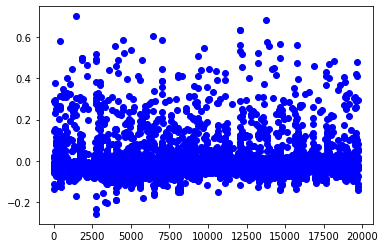

In [ ]:
plt.plot(y_test - prediction, "bo")

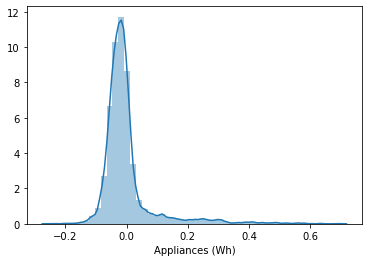

In [ ]:
sns.distplot((y_test - prediction), bins = 50)

In [ ]:
print ("The MAE is: ", metrics.mean_absolute_error(y_test, prediction).round(2))
print ("The MSE is: ", metrics.mean_squared_error(y_test, prediction))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print ("The R^2 is: ", metrics.r2_score(y_test, prediction))
print ("The RSS is: ", np.sum(np.square(y_test, prediction)))

The MAE is:  0.05
The MSE is:  0.0076587918305656595
The RMSE is:  0.0875145235407567
The R^2 is:  0.1489010226118781
The RSS is:  92.98410341514544


In [ ]:
ridge_reg = Ridge(alpha = 0.05)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_pred = ridge_reg.predict(X_test)

print ("The MAE is: ", metrics.mean_absolute_error(y_test, ridge_pred))
print ("The MSE is: ", metrics.mean_squared_error(y_test, ridge_pred))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print ("The R^2 is: ", metrics.r2_score(y_test, ridge_pred))
print ("The RSS is: ", np.sum(np.square(y_test, ridge_pred)))

The MAE is:  0.05012547918932822
The MSE is:  0.007658989106341926
The RMSE is:  0.08751565063656858
The R^2 is:  0.1488790999359314
The RSS is:  92.98410341514544


In [ ]:
lasso_reg = Lasso (alpha = 0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_pred = lasso_reg.predict(X_test)

print ("The MAE is: ", metrics.mean_absolute_error(y_test, lasso_pred))
print ("The MSE is: ", metrics.mean_squared_error(y_test, lasso_pred))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print ("The R^2 is: ", metrics.r2_score(y_test, lasso_pred))
print ("The RSS is: ", np.sum(np.square(y_test, lasso_pred)))

'lasso_pred = lasso_reg.predict(X_test)\n\nprint ("The MAE is: ", metrics.mean_absolute_error(y_test, lasso_pred))\nprint ("The MSE is: ", metrics.mean_squared_error(y_test, lasso_pred))\nprint ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))\nprint ("The R^2 is: ", metrics.r2_score(y_test, lasso_pred))\nprint ("The RSS is: ", np.sum(np.square(y_test, lasso_pred)))'

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#X_ = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(X)

In [ ]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(lm, X_train, "Linear_Model_Weight")
ridge_weights_df = get_weights_df(ridge_reg, X_train, "Ridge_Weight")
lasso_weights_df = get_weights_df(lasso_reg, X_train, "Lasso_Weight")

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weights_df, on = "Features")


final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Random variable 2,-2.310353e+10,0.000767,-0.0
1,Living Room Humidity,-4.567489e-01,-0.450404,-0.0
2,Outside Temperature (from CWS),-3.218478e-01,-0.312836,0.0
3,Living Room Temperature,-2.362220e-01,-0.231356,0.0
4,Parents Room Temperature,-1.899458e-01,-0.189841,0.0
5,Teenager Room_2 Humidity,-1.576110e-01,-0.157521,-0.0
6,Outside Humidity (from CWS),-7.765381e-02,-0.074105,-0.0
7,Ironing Room Humidity,-4.460358e-02,-0.044793,-0.0
8,Parents Room Humidity,-3.979848e-02,-0.040020,-0.0
9,Bathroom Temperature,-1.565755e-02,-0.016258,0.0


In [ ]:
x = features["Living Room Temperature"]
y = features['Outside Building Temperature (North Side)']

x= np.array([x]).reshape(-1,1)
x

array([[0.22534529],
       [0.22534529],
       [0.22534529],
       ...,
       [0.69265118],
       [0.67705355],
       [0.66617051]])

In [ ]:
x_train, x_test, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
lm.fit(x_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
slr_pred = lm.predict(x_test)

In [ ]:
score = metrics.r2_score(ytest, slr_pred)

In [ ]:
score.round(2)

0.64